In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [187]:
data = pd.read_excel("./data/Incendios-Forestales-2021.xlsx")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no.                      250 non-null    int64  
 1   Municipio                250 non-null    object 
 2   Provincia                250 non-null    object 
 3   Mes de origen            250 non-null    object 
 4   Dia de origen            250 non-null    int64  
 5   Mes de extincion         250 non-null    object 
 6   Dia extincion            250 non-null    int64  
 7   Causas                   250 non-null    object 
 8   Area Afectada en Tareas  250 non-null    int64  
 9   Metros Cuadrados         250 non-null    float64
 10  Mes de origen .1         250 non-null    int64  
 11  Fecha origen             250 non-null    object 
 12  Fecha Extincion          250 non-null    object 
 13  Fecha Mes                250 non-null    object 
dtypes: float64(1), int64(5), o

## ¿Cuáles son las causas más comunes de los incendios forestales? (Refactoriazada)

In [188]:
df_causes = data.loc[:, ["Causas"]]

In [189]:
causes = data["Causas"].value_counts()

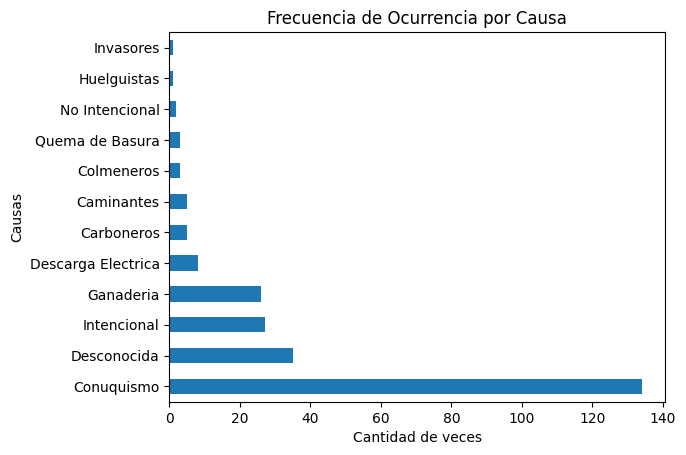

In [190]:
# Graficar
causes.plot(kind='barh')

# Agregar etiquetas y título
plt.xlabel('Cantidad de veces')
plt.ylabel('Causas')
plt.title('Frecuencia de Ocurrencia por Causa')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los municipios/provincias más afectados por los incendios forestales?(Refactorizada)


### Municipios

In [191]:
df_forest_fires = data.loc[:, ["Municipio","Provincia"]]

df_all_municipalities =  df_forest_fires["Municipio"].value_counts()


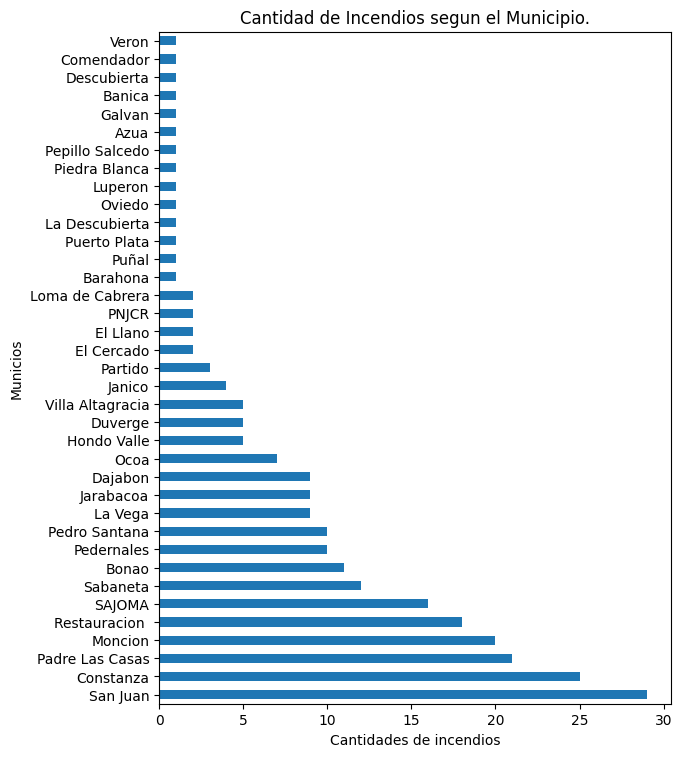

In [192]:
df_all_municipalities.plot(kind='barh')
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.1)

# Agregar etiquetas y título
plt.xlabel('Cantidades de incendios')
plt.ylabel('Municios')
plt.title('Cantidad de Incendios segun el Municipio.')

# Mostrar el gráfico
plt.show()

### Provincias

In [193]:
df_all_province = df_forest_fires["Provincia"].value_counts()

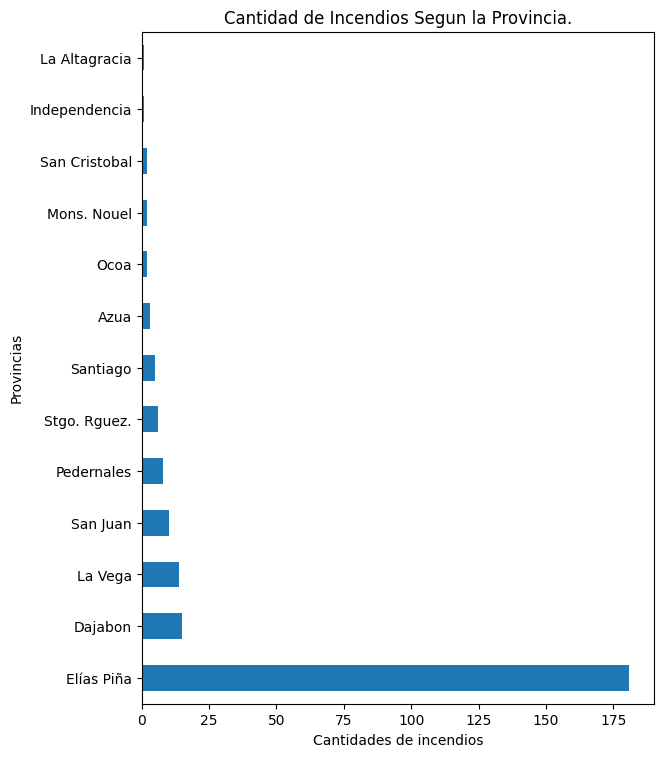

In [194]:
df_all_province.plot(kind='barh')
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.1)

# Agregar etiquetas y título
plt.xlabel('Cantidades de incendios')
plt.ylabel('Provincias')
plt.title('Cantidad de Incendios Segun la Provincia.')

# Mostrar el gráfico
plt.show()

In [195]:
import folium
# Coordenadas
coordenadas_provincia_mas_afectada = [
    [19.177711, -71.321072],
    [19.107247, -71.351460],
    [19.124213, -71.467486],
    [19.000188, -71.519974],
    [18.945327, -71.642907],
    [18.938085, -71.618160],
    [18.891633, -71.637928],
    [18.883186, -71.653233],
    [18.875946, -71.632189],
    [18.886203, -71.616884],
    [18.804777, -71.630145],
    [18.783268, -71.567662],
    [18.657242, -71.577690],
    [18.677290, -71.784762],
    [18.705925, -71.788541],
    [18.722388, -71.737907],
    [18.881209, -71.724303],
    [18.907598, -71.768656],
    [18.954779, -71.782260],
    [18.942628, -71.881261],
    [18.942628, -71.881261],
    [18.959782, -71.887307],
    [18.959782, -71.887307],
    [19.134874, -71.647647],
    [19.281773, -71.591141],
    [19.173181, -71.318580]
]


# Crear un mapa centrado en la República Dominicana
mapa = folium.Map(location=[18.735693, -70.162651], zoom_start=9)


In [196]:

# Marcar las coordenadas
folium.Polygon(locations=coordenadas_provincia_mas_afectada, color='blue', fill=True, fill_color='blue', fill_opacity=0.4).add_to(mapa)

In [197]:

# Mostrar el mapa
mapa

## ¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?


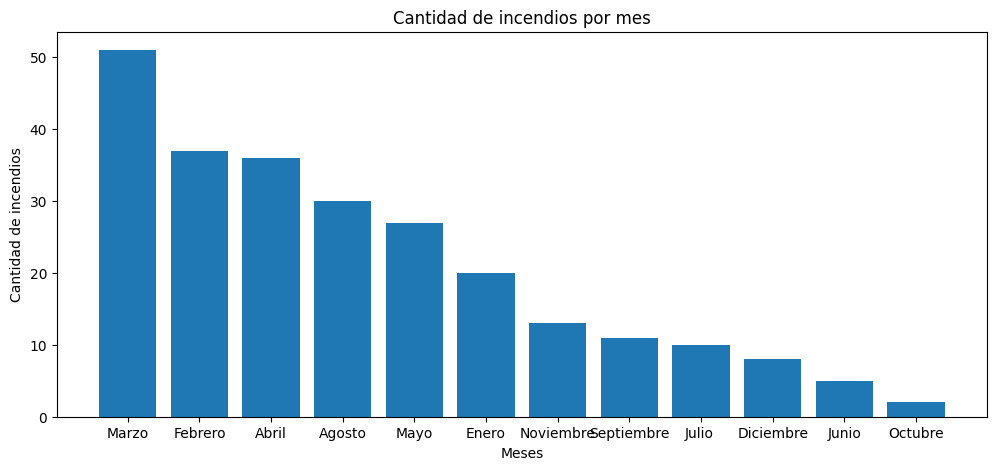

In [198]:
#¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?

def fr_mes(fire):
    #Crea una serie con la cantidad de incendios por mes 
    fire_mes = pd.Series(fire["Mes de origen "].value_counts())

    #Grafica la informacion obtenida
    plt.figure(figsize=(12, 5))
    plt.bar(fire_mes.index, fire_mes.values)
    plt.title("Cantidad de incendios por mes")
    plt.xlabel("Meses")
    plt.ylabel("Cantidad de incendios")
    plt.show()


fr_mes(data)

## ¿Cuál es la duración promedio de un incendio forestal?

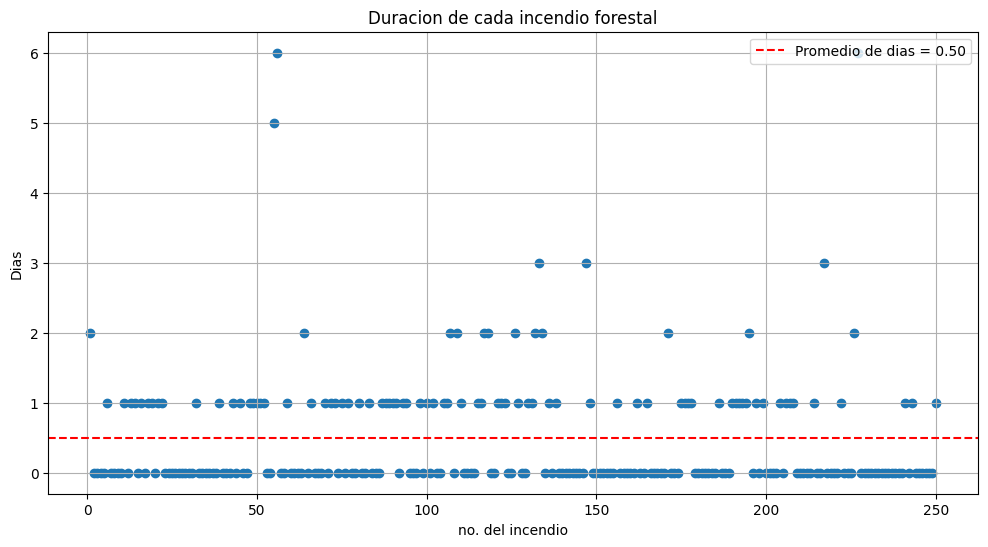

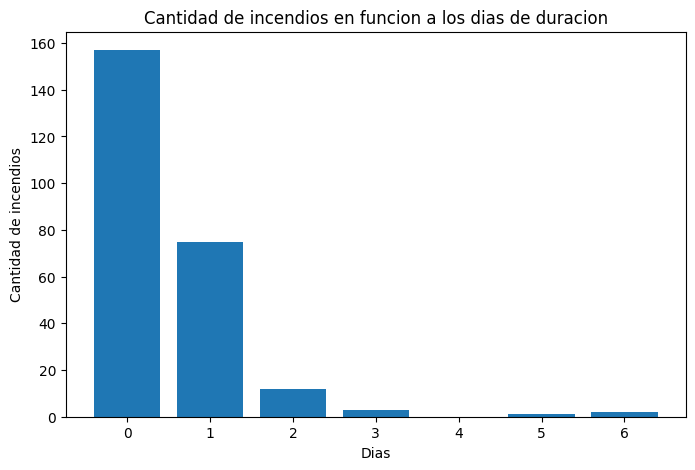

In [199]:
#¿Cuál es la duración promedio de un incendio forestal?

def d_prom(fire): #extrae la duracion promedio de los incendios en el dataframe
    #Crea otro DataFrame solo con las columnas deseadas
    delete = ["Municipio", "Provincia", "Fecha Mes", "Causas", "Area Afectada en Tareas", "Metros Cuadrados", "Dia de origen", "Dia extincion"]
    f_clean = fire.drop(delete, axis= 1).sort_values(by='no.')

    #Convierte el continido de las columnas a utilizar en tipo DateTime
    f_clean["Fecha origen"] = pd.to_datetime(f_clean["Fecha origen"], format='%m/%d/%Y')
    f_clean["Fecha Extincion"] = pd.to_datetime(f_clean["Fecha Extincion"], format='%m/%d/%Y')

    #Se descubrio que algunas informaciones sobre meses estaban erroneas, por lo que a continuacion se corrigen
    f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'] = f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'].apply(sum_m)

    #Crea otra columna con la diferencia en dias entre la fecha de inicio de los incendios y la fecha de extincion
    f_clean["Duracion en Dias"] = (f_clean["Fecha Extincion"] - f_clean["Fecha origen"]).dt.days

    #Grafica Duracion de cada incendio forestal
    plt.figure(figsize=(12, 6))
    plt.scatter(f_clean["no."], f_clean["Duracion en Dias"])
    plt.title("Duracion de cada incendio forestal")
    plt.xlabel("no. del incendio")
    plt.ylabel("Dias")
    plt.grid()
    prom = np.mean(f_clean["Duracion en Dias"])
    plt.axhline(y=prom, color='r', linestyle='--', label=f'Promedio de dias = {prom:.2f}')
    plt.legend(loc='upper right')
    plt.show()
    
    #Grafica Cantidad de incendios en funcion a los dias de duracion
    dat = f_clean["Duracion en Dias"].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(dat.index, dat.values)
    plt.title("Cantidad de incendios en funcion a los dias de duracion")
    plt.xlabel("Dias")
    plt.ylabel("Cantidad de incendios")
    plt.show()

    #print(f_clean.sort_values(by='Duracion en Dias'))


def sum_m(fecha):
  fecha = dt.strftime(fecha, "%m-%d-%Y")
  m, d, y = fecha.split("-")
  m = int(m) + 1
  return dt.strptime(f"{m}-{d}-{y}", "%m-%d-%Y")

d_prom(data)